In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from disp import get_line, set_plot
from run_train import TrainArgs, train

### Classification test data

In [2]:
args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_clf", save_training=2,
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir="fly_mini/clf",
    problem_type='clf', dt_global=True, epochs=3, jax_seed=5464368, lr_factor=2, n_layers=2,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=256,
    warmup_end=1, weight_decay=0.05
)

train(args)

[*] Setting Randomness...
[*] Generating Fly Courtship Classification Dataset


/home/rp21/.conda/envs/s5-gpu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clearing cache...


Saving the dataset (1/1 shards): 100%|██████████| 1543/1543 [00:00<00:00, 338130.15 examples/s]


Fly song vocab size: 6
[*] Starting S5 clf training on `fly_mini/clf` =>> Initializing...
Lambda.shape=(128,)
V.shape=(256, 128)
Vinv.shape=(128, 256)
configuring standard optimization setup
[*] Trainable Parameters: 13322


/scratch/gpfs/rp21/s5_test/S5-fly/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


[*] Starting Training Epoch 1...
using linear warmup for epoch 1


100%|██████████| 192/192 [00:34<00:00,  5.53it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 49/49 [00:19<00:00,  2.51it/s]


[*] Running Epoch 1 Test...


100%|██████████| 49/49 [00:01<00:00, 34.46it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 0.83785 -- Val Loss: 0.05287 --Test Loss: 0.05287 -- Val Accuracy: 0.9812 Test Accuracy: 0.9812
	Best Val Loss: 0.05287 -- Best Val Accuracy: 0.9812 at Epoch 1
	Best Test Loss: 0.05287 -- Best Test Accuracy: 0.9812 at Epoch 1

[*] Starting Training Epoch 2...
using cosine annealing for epoch 2


100%|██████████| 192/192 [00:21<00:00,  8.83it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 49/49 [00:01<00:00, 34.22it/s]


[*] Running Epoch 2 Test...


100%|██████████| 49/49 [00:01<00:00, 32.86it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.04192 -- Val Loss: 0.03359 --Test Loss: 0.03359 -- Val Accuracy: 0.9896 Test Accuracy: 0.9896
	Best Val Loss: 0.03359 -- Best Val Accuracy: 0.9896 at Epoch 2
	Best Test Loss: 0.03359 -- Best Test Accuracy: 0.9896 at Epoch 2

[*] Starting Training Epoch 3...
using cosine annealing for epoch 3


100%|██████████| 192/192 [00:21<00:00,  8.98it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 49/49 [00:01<00:00, 34.47it/s]


[*] Running Epoch 3 Test...


100%|██████████| 49/49 [00:01<00:00, 33.10it/s]


=>> Epoch 3 Metrics ===
	Train Loss: 0.03413 -- Val Loss: 0.03353 --Test Loss: 0.03353 -- Val Accuracy: 0.9896 Test Accuracy: 0.9896
	Best Val Loss: 0.03359 -- Best Val Accuracy: 0.9896 at Epoch 2
	Best Test Loss: 0.03359 -- Best Test Accuracy: 0.9896 at Epoch 2



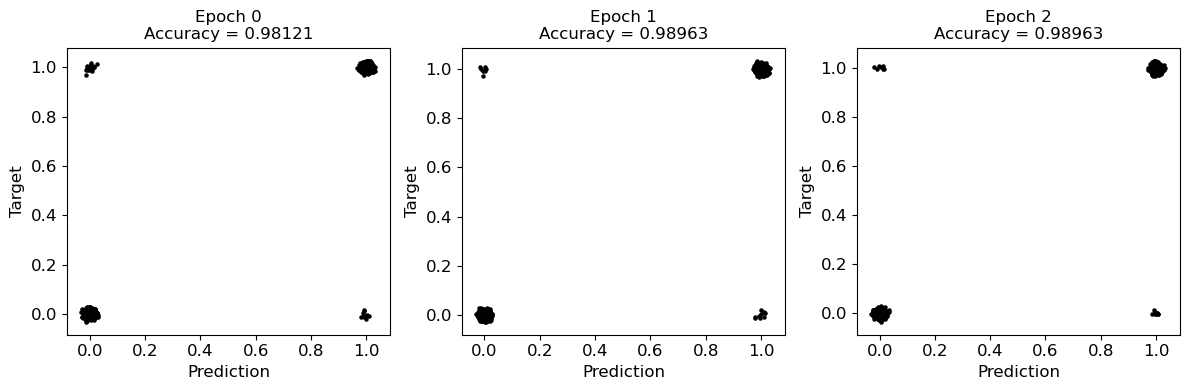

In [3]:
# load results
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_clf/epoch_{cepoch}.npy', allow_pickle=True)[0]
    targs = data['val_targ']
    
    logits = data['val_pred']
    logits = np.reshape(logits, (len(logits)//2, 2))
    preds = np.argmax(logits, axis=1)
    
    ax.scatter(preds+.01*np.random.randn(len(preds)), targs+.01*np.random.randn(len(targs)), c='k', s=5)
    acc = np.mean(preds == targs)
    set_plot(ax, x_label='Prediction', y_label='Target', title=f'Epoch {cepoch}\nAccuracy = {acc:.5f}')

### Scrambled classification test data

In [4]:
args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_clf", save_training=2,
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir="fly_mini/clf_scrambled",
    problem_type='clf', dt_global=True, epochs=3, jax_seed=5464368, lr_factor=2, n_layers=2,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=256,
    warmup_end=1, weight_decay=0.05
)

train(args)

[*] Setting Randomness...
[*] Generating Fly Courtship Classification Dataset
Clearing cache...


Saving the dataset (1/1 shards): 100%|██████████| 1556/1556 [00:00<00:00, 334958.79 examples/s]


Fly song vocab size: 6
[*] Starting S5 clf training on `fly_mini/clf_scrambled` =>> Initializing...
Lambda.shape=(128,)
V.shape=(256, 128)
Vinv.shape=(128, 256)
configuring standard optimization setup
[*] Trainable Parameters: 13322
[*] Starting Training Epoch 1...
using linear warmup for epoch 1


100%|██████████| 194/194 [00:34<00:00,  5.68it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 49/49 [00:12<00:00,  3.97it/s]


[*] Running Epoch 1 Test...


100%|██████████| 49/49 [00:01<00:00, 34.49it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 1.15261 -- Val Loss: 0.68896 --Test Loss: 0.68896 -- Val Accuracy: 0.5443 Test Accuracy: 0.5443
	Best Val Loss: 0.68896 -- Best Val Accuracy: 0.5443 at Epoch 1
	Best Test Loss: 0.68896 -- Best Test Accuracy: 0.5443 at Epoch 1

[*] Starting Training Epoch 2...
using cosine annealing for epoch 2


100%|██████████| 194/194 [00:21<00:00,  8.97it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 49/49 [00:01<00:00, 34.20it/s]


[*] Running Epoch 2 Test...


100%|██████████| 49/49 [00:01<00:00, 32.57it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.68713 -- Val Loss: 0.68389 --Test Loss: 0.68389 -- Val Accuracy: 0.5611 Test Accuracy: 0.5611
	Best Val Loss: 0.68389 -- Best Val Accuracy: 0.5611 at Epoch 2
	Best Test Loss: 0.68389 -- Best Test Accuracy: 0.5611 at Epoch 2

[*] Starting Training Epoch 3...
using cosine annealing for epoch 3


100%|██████████| 194/194 [00:21<00:00,  8.99it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 49/49 [00:01<00:00, 34.51it/s]


[*] Running Epoch 3 Test...


100%|██████████| 49/49 [00:01<00:00, 32.89it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.68451 -- Val Loss: 0.68348 --Test Loss: 0.68348 -- Val Accuracy: 0.5636 Test Accuracy: 0.5636
	Best Val Loss: 0.68348 -- Best Val Accuracy: 0.5636 at Epoch 3
	Best Test Loss: 0.68348 -- Best Test Accuracy: 0.5636 at Epoch 3



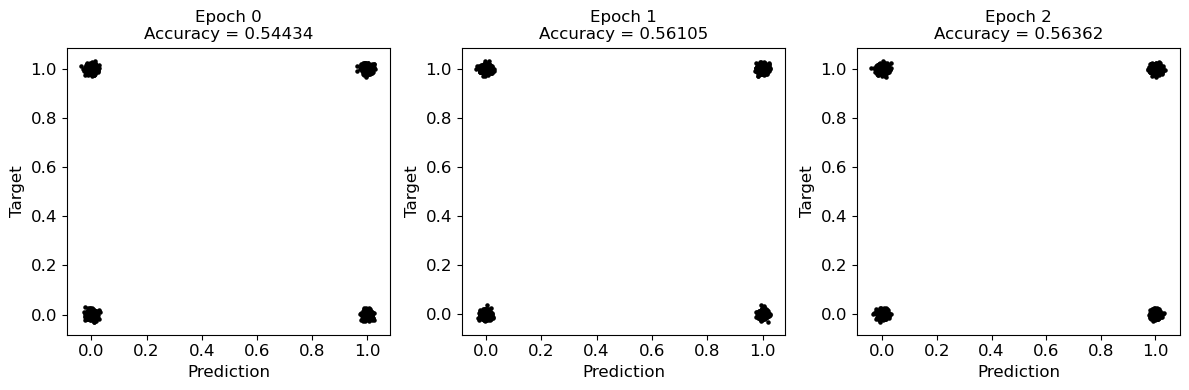

In [5]:
# load results
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_clf/epoch_{cepoch}.npy', allow_pickle=True)[0]
    targs = data['val_targ']
    
    logits = data['val_pred']
    logits = np.reshape(logits, (len(logits)//2, 2))
    preds = np.argmax(logits, axis=1)
    
    ax.scatter(preds+.01*np.random.randn(len(preds)), targs+.01*np.random.randn(len(targs)), c='k', s=5)
    acc = np.mean(preds == targs)
    set_plot(ax, x_label='Prediction', y_label='Target', title=f'Epoch {cepoch}\nAccuracy = {acc:.5f}')